### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [2]:
# Settings to display all columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
df_ratings = pd.read_csv('Data.csv')
df_movies = pd.read_csv('item.csv')
df_user = pd.read_csv('user.csv')

In [4]:
display(df_ratings.head())
display(df_movies.head())
display(df_user.head())

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [5]:
print("Shape of Ratings Df", df_ratings.shape)
print("Shape of Movies Df", df_movies.shape)
print("Shape of User Df", df_user.shape)

Shape of Ratings Df (100000, 4)
Shape of Movies Df (1681, 22)
Shape of User Df (943, 5)


In [6]:
df_ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
df_movies.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df_user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


### Missing values in the Ratings DF, Movies DF and User DF
 - None of the 3 df have any missing values

In [9]:
df_movies.isna().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [10]:
df_user.isna().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [11]:
df_ratings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [12]:
df_movies.drop(['movie title','release date'], axis=1).sum().drop('movie id')

unknown        1  
Action         251
Adventure      135
Animation      42 
Childrens      122
Comedy         505
Crime          109
Documentary    50 
Drama          725
Fantasy        22 
Film-Noir      24 
Horror         92 
Musical        56 
Mystery        61 
Romance        247
Sci-Fi         101
Thriller       251
War            71 
Western        27 
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

### Solution
 - Calculated the sum along the axis=1 and filtered it based on the dervied sum column

In [13]:
df_movies['genre_count']= df_movies.iloc[:, 2:].sum(axis=1)
df_movies_more_genre = df_movies[df_movies['genre_count'] >1]
df_movies_more_genre[["movie title","genre_count"]].head()

,movie title,genre_count
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

### Solution
 - There is only one movie which has unknown value and dropping the record by using the filter condition

In [14]:
df_movies[df_movies['unknown']==1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_count
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
df_without_unknown = df_movies[df_movies['unknown']!=1]
df_without_unknown.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_count
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

### Solution:
 - Calculated the release year by using pandas datetime function
 - Plot the distribution using Seaborn
### Inference
 - Most of the users in this group are in theage group of 18-50 with peak population are in age group 25-30
 - Rating 4 is the most commonly used rating followed by 3 and 5. Very less movies got rating of 1
 - Number of movies which got released every year started seeing an increase from 1990 with a spike being noticed around 1995
 - Most of the users in this dataset are students followed by category "other", "educator" and "Adminsitrators".
     - Doctors and Home makers population are very less in this dataset

In [16]:
df_movies['release date'] = pd.to_datetime(df_movies['release date'])
df_movies['release_year'] = df_movies['release date'].dt.year

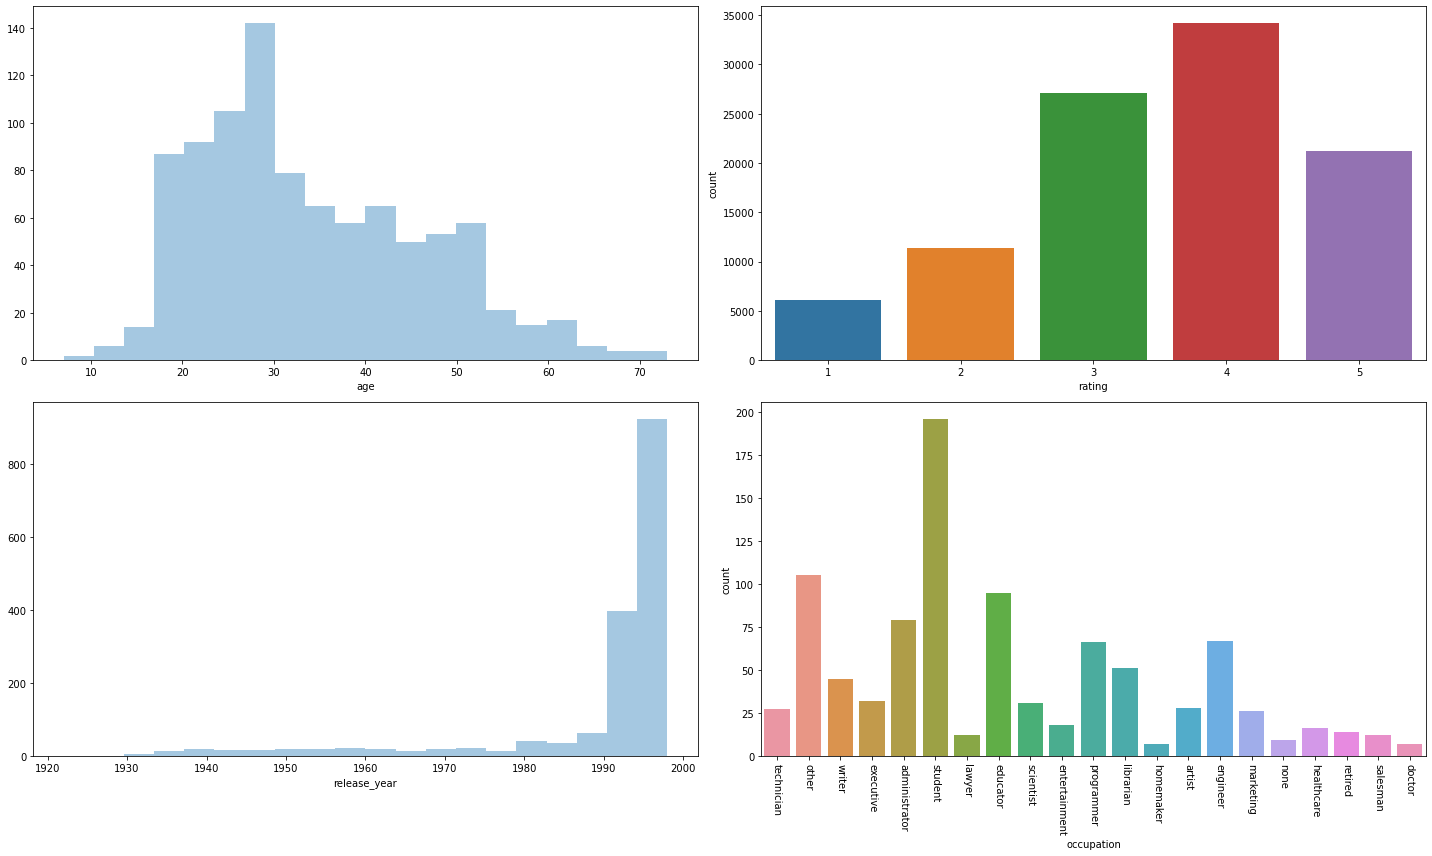

In [17]:
fig,ax = plt.subplots(2,2, figsize=(20,12))
sns.distplot(df_user['age'],kde=False,bins=20, ax=ax[0,0])
sns.countplot(x='rating', data= df_ratings, ax=ax[0,1])
sns.distplot(df_movies['release_year'],kde=False,bins=20, ax=ax[1,0])
occp_plot = sns.countplot(x='occupation', data= df_user, ax=ax[1,1])
occp_plot.set_xticklabels(occp_plot.get_xticklabels(), rotation=-90)
plt.tight_layout()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

### Solution:
 - Grouped the movies by release year and have calculated the sum along the axis 1
 - Stored the movie genres in a seperate list variable 
 - Set the release year as the index
 - Loop through the movie genres and plot the popularity over years. Just to ensure we are getting good idea of how the popularity looks, have made the y-axis of fixed height

### Inferences
 - Drama has gained increased popularity over the years followed by Comedy and Romance
 - There is a popularity dip for all the genres around the year 1997. Needs to investigate
 

In [18]:
#Your answer here
df_pop_genre = df_movies.groupby('release_year').sum().reset_index()
df_pop_genre.tail()



,release_year,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_count
66,1994,189000,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
67,1995,183514,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
68,1996,322295,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559
69,1997,253649,0,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0,496
70,1998,75341,0,12,3,0,1,13,7,3,33,1,2,4,1,3,11,5,18,0,0,117


In [19]:
movie_genres = (list(df_movies.columns))[3:len(df_movies.columns)-2]

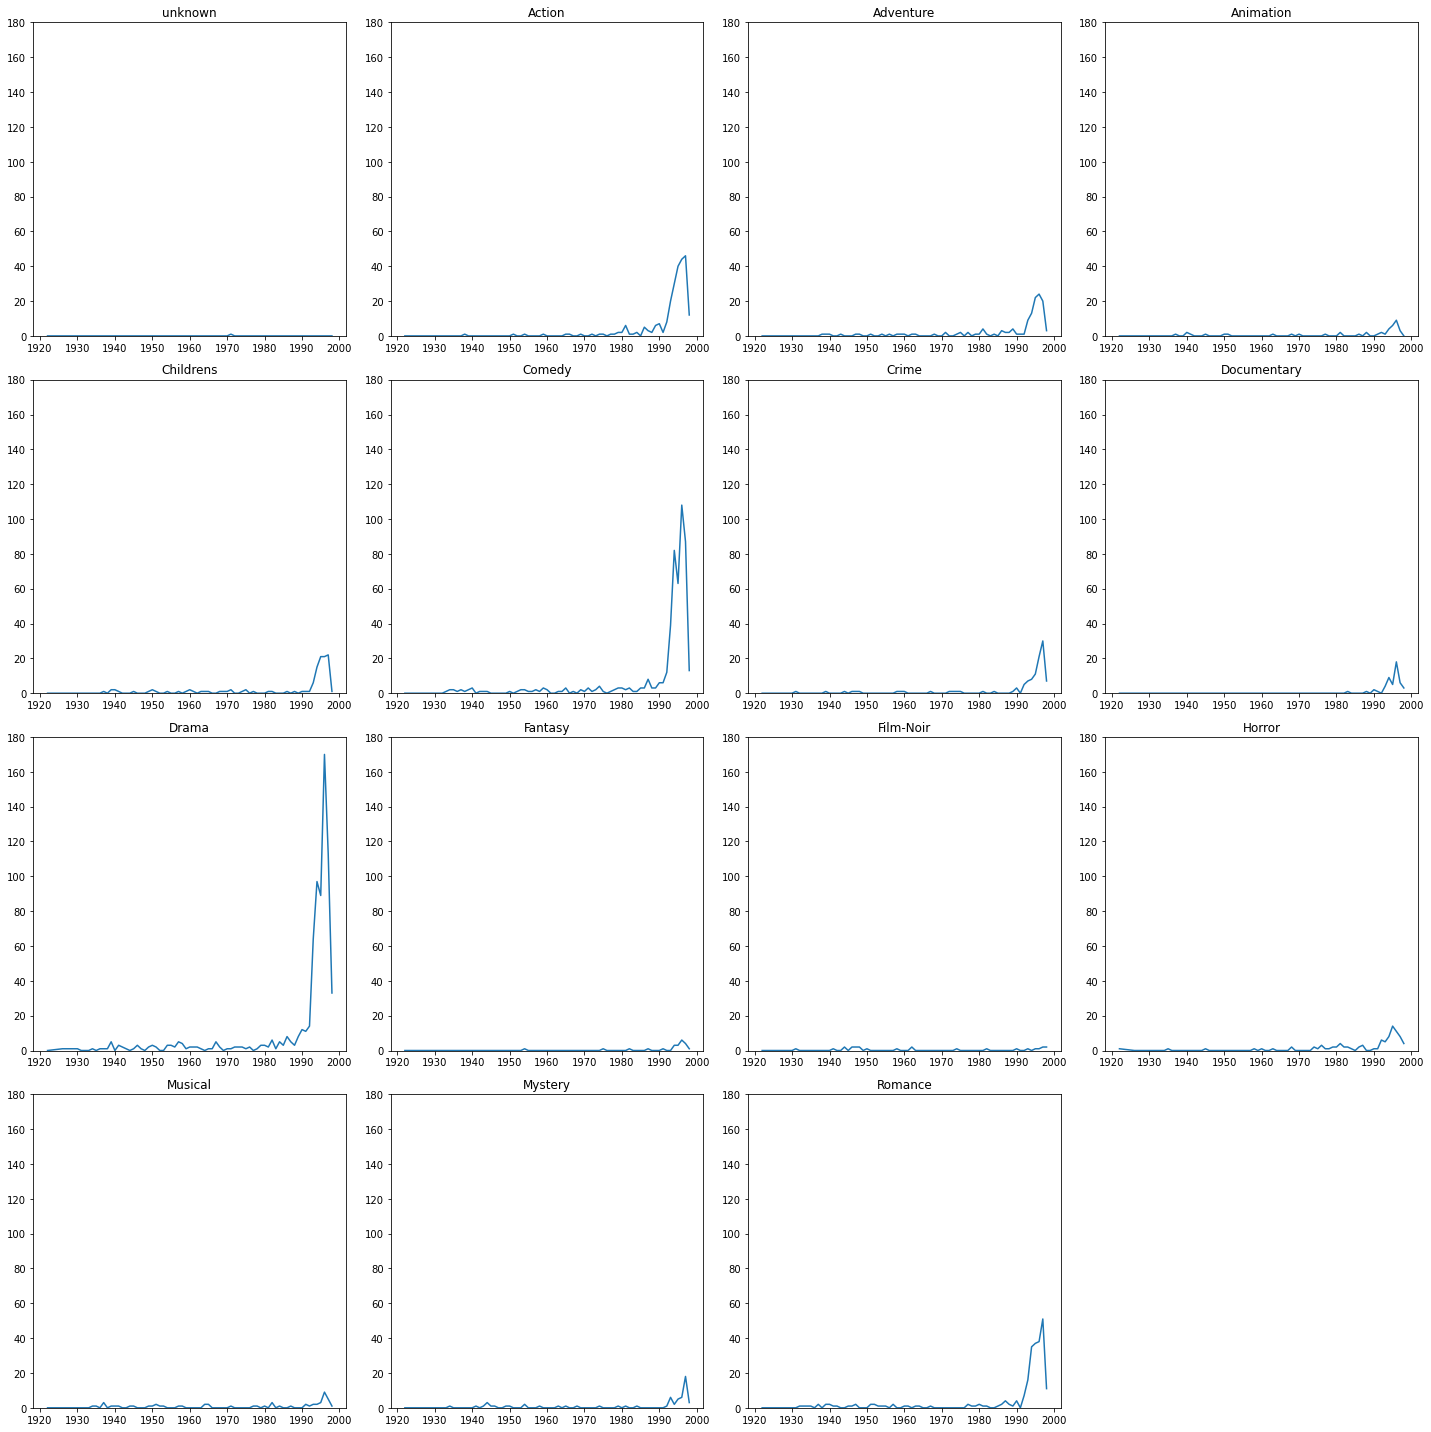

In [20]:

df_pop_genre.set_index('release_year')
fig = plt.figure(figsize=(20,20))

for c,num in zip(movie_genres, range(1,16)):
    ax = fig.add_subplot(4,4,num)
    plt.ylim(0, 180)
    ax.set_title(c)
    plt.plot(df_pop_genre.set_index('release_year')[c])

plt.tight_layout()
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

### Solution
 - Group by movie id and calculate Mean and Count
 - Filter the ones which are having count greater than 100
 - Apply sorting and show the top 25 movies

### Inference
 - Close Shave,A has got high average rating, followed by Schindler List, Wrong Trousers
 - Star Wars, God Father, Slience of the lambs are some of the movies which got more number of ratings with good average

In [21]:
df_rating_agg = df_ratings.groupby('movie id').agg(Mean=('rating', 'mean'), Count=('rating', 'count')).reset_index()
df_top_25 = df_rating_agg[df_rating_agg['Count']>100]
df_top_25 = pd.merge(df_top_25,df_movies,on='movie id')[["movie id","movie title","Mean","Count"]]
df_top_25.sort_values(by='Mean', ascending=False).head(25)

,movie id,movie title,Mean,Count
231,408,"Close Shave, A",4.491071,112
202,318,Schindler's List,4.466443,298
91,169,"Wrong Trousers, The",4.466102,118
261,483,Casablanca,4.456790,243
29,64,"Shawshank Redemption, The",4.445230,283
292,603,Rear Window,4.387560,209
7,12,"Usual Suspects, The",4.385768,267
22,50,Star Wars,4.358491,583
99,178,12 Angry Men,4.344000,125
72,134,Citizen Kane,4.292929,198


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.
2. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

### Solution :
 - Merge all the dataframes and form a single df
 - Group the data by gender and since it has been asked to find the popularity based on the ratings given to the particular genre out of the total ratings, calculations are applied accordingly

### Inferences:
 - Men watch more drama than women(825 to 907 in terms of rating)
 - Women watch more scifi than men (3457-2594 in terms of rating)
 - Men watch more Romance than women(1926-1551 in terms of rating)

In [22]:
df_merge = pd.merge(df_user,df_ratings,on='user id')
df_merge = pd.merge(df_merge,df_movies, on='movie id')
df_merge.head()

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_count,release_year
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,1994-01-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1994
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,1994-01-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1994
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,1994-01-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1994
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White,1994-01-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1994
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White,1994-01-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1994


In [23]:
df_merge = df_merge.groupby('gender').sum().reset_index()
df_merge.head()

,gender,user id,age,movie id,rating,timestamp,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_count,release_year
0,F,12225832,831719,11452645,90894,22748573259055,0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701,51177156
1,M,34019836,2465018,31097965,262061,65596431148640,1,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158885,147600574


In [24]:
df_merge_group = df_merge.groupby('gender').sum().reset_index()
df_merge_group.drop(['user id','age','movie id','timestamp','genre_count','release_year'],axis=1,inplace=True)
df_merge_group.head()

,gender,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,F,90894,0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
1,M,262061,1,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [25]:
df_merge_group[movie_genres]=df_merge_group.iloc[:,2:].apply(lambda x: round((df_merge_group['rating']*100/x),2))
df_merge_group.head()

,gender,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,F,90894,inf,1670.23,2893.79,9135.08,4072.31,1126.6,5066.56,48606.42,825.71,25039.67,23608.83,7593.48,6303.33,6917.35,1551.62,3457.36,1787.14,4152.31,24499.73
1,M,262061,26206100.0,1300.74,2469.48,10040.65,5294.16,1204.1,4185.61,45895.10,907.19,26497.57,19440.73,6360.70,7461.87,6666.52,1926.49,2594.41,1561.19,3635.19,17671.00
